In [1]:
import json

with open('results.json') as f:
    results = json.load(f)

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def plot_instances(features):
    fig, axes = plt.subplots(1, 20)
    fig.set_size_inches(30, 5)
    for i, ax in enumerate(axes):
        image = plt.imread(features[i][0])
        label = float(features[i][1])
        # image = image / 255.0
        ax.set_title(f"{label:.3f}")
        ax.imshow(image)
        ax.set_axis_off()
    plt.show()

In [4]:
def visualize_concept(concept_id=0):
    print(f"Concept #{concept_id}")
    print()
    pair = results[concept_id]
    print(pair["concept"])
    plot_instances(pair["feature"])

Concept #0

[['blue', 0.8293485794610125], ['four', 0.3895185751764755], ['green', 0.3513288712598444], ['color', 0.09778334710741955], ['red', 0.0807093104726173], ['round', 0.07069710484607433], ['position', 0.05021771218950752], ['shape', 0.048022579330557244], ['right', 0.042828557960285424], ['white', 0.04014888908895731]]


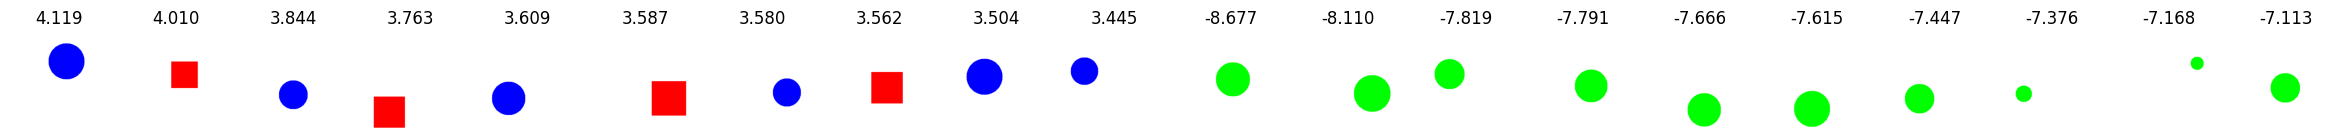

Concept #1

[['blue', 0.34338415381385057], ['four', 0.24986386565658136], ['red', 0.20407376107646197], ['color', 0.1660582796991033], ['blank', 0.13461800548542038], ['angle', 0.11738617054330625], ['white', 0.10817584460715952], ['position', 0.10031380325878862], ['shape', 0.05584468561701658], ['up', 0.05539167605050641]]


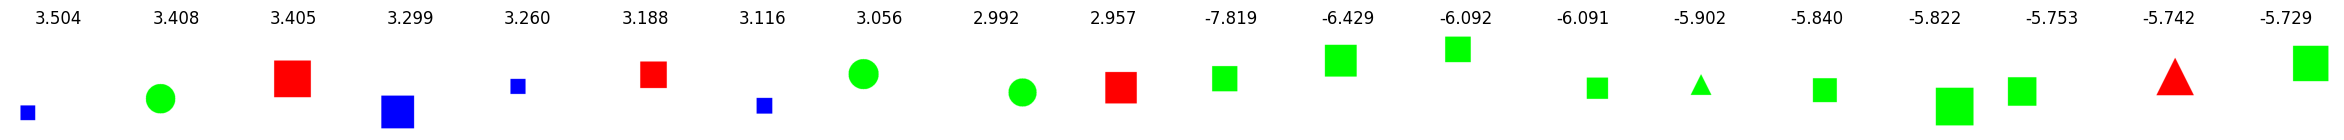

Concept #2

[['three', 0.990945056298884], ['red', 0.4358301356434822], ['green', 0.2810778085736755], ['round', 0.2194378185320676], ['four', 0.14108345771465844], ['bottom', 0.07800744252385386], ['blue', 0.04109748903495388], ['shape', 0.04093496916628869], ['angle', 0.04051976135763438], ['has', 0.04043608792679861]]


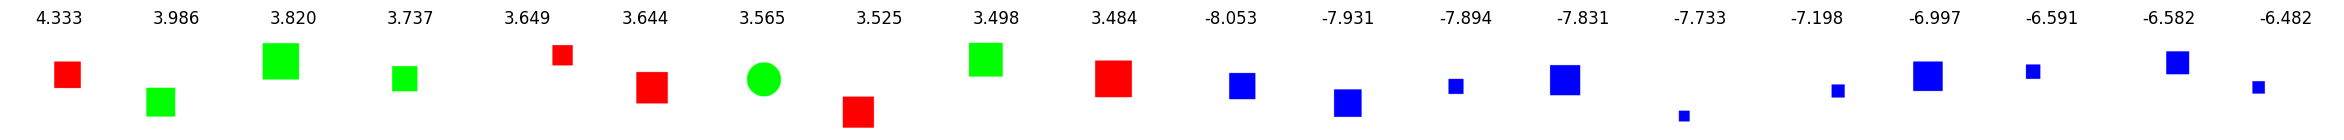

Concept #3

[['three', 0.8343200835755201], ['blue', 0.6511181469370679], ['green', 0.19671555142092512], ['is', 0.09335236731704658], ['four', 0.09249948875569716], ['round', 0.09232512539237496], ['color', 0.08292454017766658], ['red', 0.05844185995468037], ['has', 0.0550609094223265], ['left', 0.05204978368096481]]


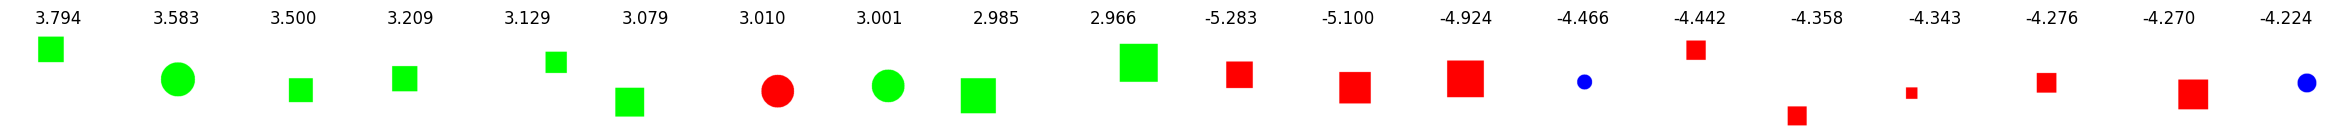

Concept #4

[['red', 0.6813471510642912], ['three', 0.4809566728467864], ['green', 0.21694951985992975], ['color', 0.21620060721491804], ['round', 0.193848653852455], ['blue', 0.12777236631760994], ['is', 0.05641037606126894], ['four', 0.055700628784280726], ['has', 0.03871526750679151], ['white', 0.03640947536492693]]


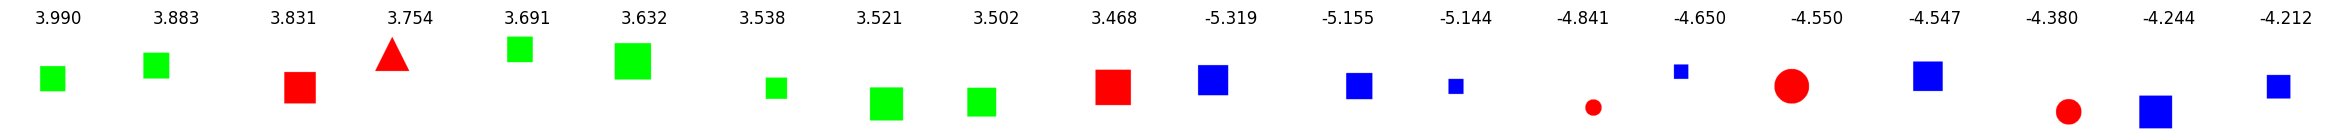

Concept #5

[['red', 0.8652520767072353], ['blue', 0.29552794137621313], ['three', 0.2900765545605644], ['four', 0.27181206917375084], ['angle', 0.11831626853019726], ['round', 0.11059091383954738], ['up', 0.05417742684070081], ['this', 0.05175171084474863], ['shape', 0.04764753431813706], ['position', 0.04472679803201545]]


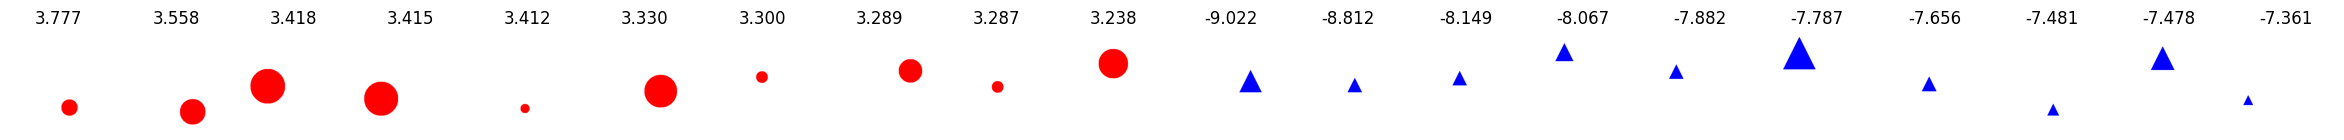

Concept #6

[['green', 0.8183963590521154], ['red', 0.3212647790831279], ['three', 0.22503950887821556], ['angle', 0.15142939989644338], ['round', 0.0917407956519505], ['canvas', 0.08695464980432657], ['blue', 0.05569376680787986], ['color', 0.054380692048174986], ['bottom', 0.04882937308830563], ['white', 0.042799185585226766]]


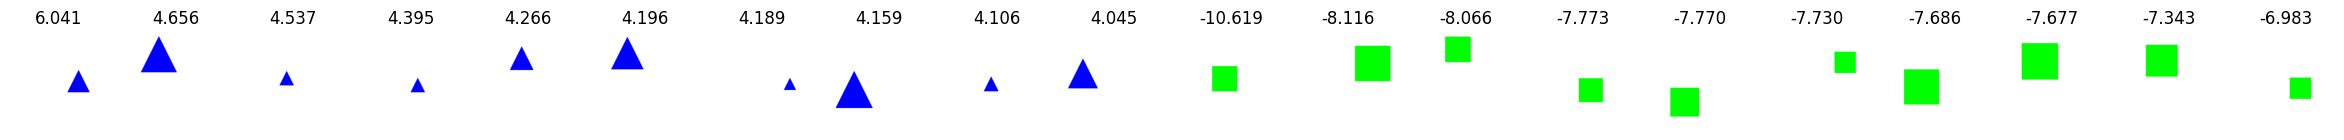

Concept #7

[['three', 0.6643814512384616], ['blue', 0.5789478642464714], ['color', 0.3164873533743386], ['green', 0.17048963723625898], ['four', 0.11582611127552099], ['red', 0.08050990613228054], ['position', 0.0448073328220283], ['has', 0.03862255513933071], ['is', 0.03694596320269554], ['left', 0.032442512201403616]]


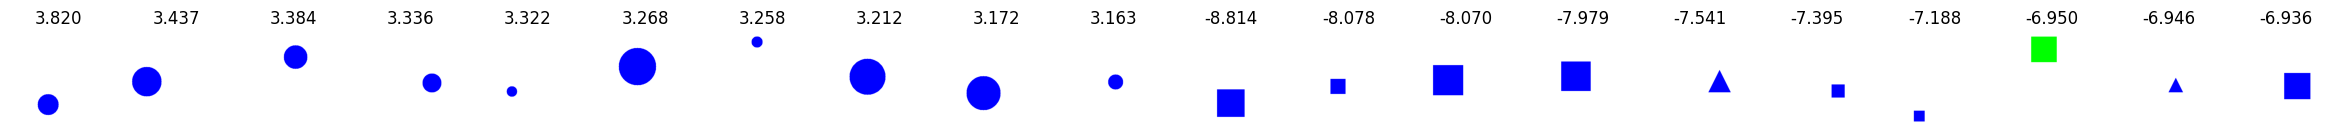

Concept #8

[['green', 0.9349505377978813], ['red', 0.4393028613937095], ['four', 0.3234916850583764], ['round', 0.13949432548710972], ['blue', 0.11181482295089258], ['three', 0.07743446284060829], ['color', 0.07400455242996154], ['bottom', 0.06860303415189534], ['up', 0.06003654751744445], ['canvas', 0.0530046751094871]]


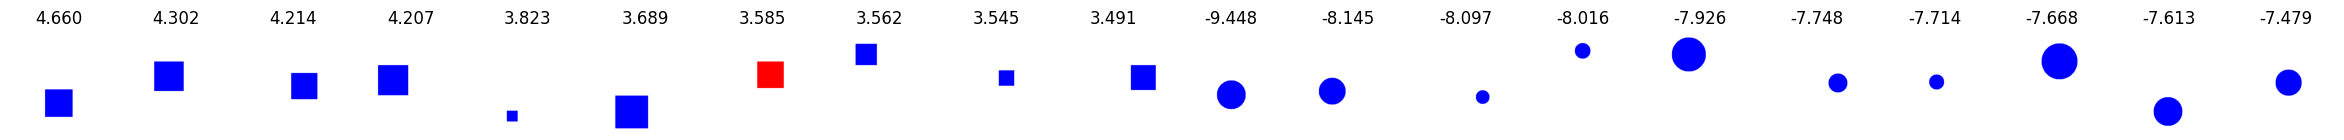

Concept #9

[['blue', 0.7225296904401082], ['green', 0.6852453497851767], ['four', 0.6384826083493427], ['round', 0.20687431737901718], ['three', 0.09090827113486886], ['color', 0.06676201223733969], ['angle', 0.06275139618740697], ['red', 0.0331849185818034], ['shape', 0.026763129561665017], ['is', 0.022911409187183634]]


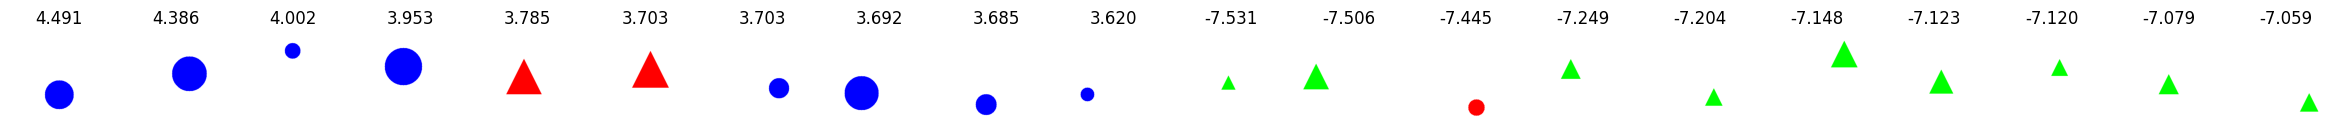

In [5]:
for i in range(10):
    visualize_concept(i)